**Sentiment Analysis of Customer Reviews on British Airways from Skytrax**



1.   In this project, I scrapped customer reviews on British Airways from a website "Skytrax".
2.   After creating a dataframe using the data, I cleaned removing any duplicates and missing values.
3.   In the next step I cleaned and prepocessed the data for analysis.
4.   Then I performed sentiment analysis and created graphs.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
  print(f"Scraping page {i}")

  url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

  response = requests.get(url)
  content = response.content
  parsed_content = BeautifulSoup(content, "html.parser")
  for para in parsed_content.find_all("div", {"class" : "text_content"}):
    reviews.append(para.get_text())

  print(f" ---> {len(reviews)} total reviews")

Scraping page 1
 ---> 100 total reviews
Scraping page 2
 ---> 200 total reviews
Scraping page 3
 ---> 300 total reviews
Scraping page 4
 ---> 400 total reviews
Scraping page 5
 ---> 500 total reviews
Scraping page 6
 ---> 600 total reviews
Scraping page 7
 ---> 700 total reviews
Scraping page 8
 ---> 800 total reviews
Scraping page 9
 ---> 900 total reviews
Scraping page 10
 ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | The worst business class ex...
1,Not Verified | Quite possibly the worst busin...
2,Not Verified | I will never be flying with BA...
3,✅ Trip Verified | On the my trip to Mexico Ci...
4,✅ Trip Verified | I upgraded at check in to C...


In [4]:
df.to_csv("BA_reviews.csv")

In [5]:
import os

In [6]:
folder_path = 'data'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

file_path = os.path.join(folder_path, 'BA_reviews.csv')

df.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")

File saved at: data/BA_reviews.csv


Data Cleaning

In [7]:
df.drop_duplicates(inplace =True)

In [8]:
df.dropna(inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

Text Preprocessing

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [11]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [13]:
from nltk import word_tokenize
import pandas as pd

def preprocess_reviews(reviews):
    words = word_tokenize(reviews)
    clean_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(clean_words)

# Apply preprocessing to the reviews column
df['clean_reviews'] = df['reviews'].apply(preprocess_reviews)

Analysis

In [14]:
#sentiment analysis
from textblob import TextBlob

In [15]:
def analyze_sentiment(reviews):
  analysis = TextBlob(reviews)
  return analysis.sentiment.polarity

In [16]:
df['sentiment_score'] = df['reviews'].apply(analyze_sentiment)

In [17]:
df.head()

,reviews,clean_reviews,sentiment_score
0,✅ Trip Verified | The worst business class ex...,trip verified worst business class experience ...,-0.019097
1,Not Verified | Quite possibly the worst busin...,verified quite possibly worst business class e...,-0.021667
2,Not Verified | I will never be flying with BA...,verified never flying ba first last flying sin...,0.106034
3,✅ Trip Verified | On the my trip to Mexico Ci...,trip verified trip mexico city opportunity exp...,0.141721
4,✅ Trip Verified | I upgraded at check in to C...,trip verified upgraded check club europe seat ...,0.694231


In [18]:
#topic modeling
import gensim
from gensim import corpora

In [19]:
tokenized_reviews = [word_tokenize(reviews) for reviews in df['clean_reviews']]

In [20]:
dictionary = corpora.Dictionary(tokenized_reviews)

In [21]:
corpus = [dictionary.doc2bow(reviews) for reviews in tokenized_reviews]

In [22]:
#lda model
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word=dictionary, num_topics=5, passes=10)

In [23]:
for idx , topic in lda_model.print_topics():
  print(f"Token {idx}:{topic}")

Token 0:0.021*"flight" + 0.014*"ba" + 0.011*"verified" + 0.010*"trip" + 0.007*"service" + 0.007*"crew" + 0.006*"one" + 0.006*"cabin" + 0.006*"airline" + 0.006*"time"
Token 1:0.023*"flight" + 0.016*"trip" + 0.015*"verified" + 0.015*"ba" + 0.014*"time" + 0.010*"seat" + 0.010*"crew" + 0.008*"food" + 0.008*"service" + 0.008*"good"
Token 2:0.034*"flight" + 0.019*"ba" + 0.011*"verified" + 0.010*"hour" + 0.010*"u" + 0.010*"trip" + 0.009*"customer" + 0.009*"service" + 0.008*"london" + 0.008*"british"
Token 3:0.021*"flight" + 0.019*"seat" + 0.014*"ba" + 0.013*"verified" + 0.012*"service" + 0.012*"class" + 0.011*"trip" + 0.011*"good" + 0.011*"business" + 0.010*"food"
Token 4:0.025*"flight" + 0.020*"seat" + 0.012*"verified" + 0.010*"trip" + 0.007*"service" + 0.007*"ba" + 0.007*"hour" + 0.006*"time" + 0.006*"airline" + 0.006*"class"


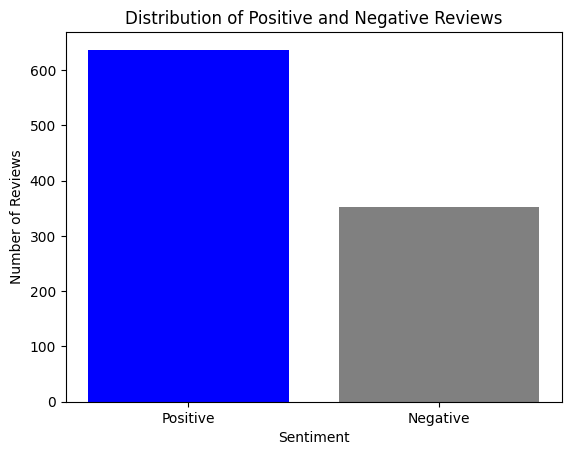

In [25]:
import matplotlib.pyplot as plt

# Count the number of positive and negative reviews
positive_reviews_count = df[df['sentiment_score'] > 0].shape[0]
negative_reviews_count = df[df['sentiment_score'] < 0].shape[0]

# Create a bar plot
plt.bar(['Positive', 'Negative'], [positive_reviews_count, negative_reviews_count], color=['blue', 'grey'])
plt.title('Distribution of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

The bar graph shows that the number of positive reviews are over 600, while there are around 350 negative reviews.

In [26]:
total_reviews = df.shape[0]

positive_reviews_percentage = (positive_reviews_count/ total_reviews) * 100
negative_reviews_percentage = (negative_reviews_count/ total_reviews) * 100

print(f"Positive reviews: {positive_reviews_percentage: .2f}%")
print(f"Negative reviews: {negative_reviews_percentage: .2f}%")

Positive reviews:  63.70%
Negative reviews:  35.20%
